In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNetCV
import warnings
warnings.filterwarnings('ignore')
## グラフで日本語表示
import matplotlib as mpl
mpl.rcParams['font.family'] = 'IPAPGothic'
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6
rcParams["font.size"] = 18
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
import gc


drop_columns = ["category","media_name","account_name","campaign_name","adgroup_name"]
def delete_fractional_portion(id):
    if id.endswith(".0"):
        return id[:-2]
    return id
def read_report(path, encoding=None,delimiter=None):
    _df = pd.read_csv(path, encoding=encoding,delimiter=delimiter)
    _df["campaign_id"] = _df["campaign_id"].astype(str).apply(delete_fractional_portion)
    _df["adgroup_id"] = _df["adgroup_id"].astype(str)
    _df["report_date"] = pd.to_datetime(_df["report_date"])
    _df["media_account_id"] = _df["media_account_id"].astype(str).apply(delete_fractional_portion)
    return _df.sort_values(by=["report_date", "campaign_id"])
pd.set_option('display.max_columns', 150)

In [2]:
p_df=pd.read_csv("pitch_df.csv")
p_df

,pitcher_id,batter_id,pitch_type,start_speed,end_speed,spin_dir,spin_rate,pfx_x,pfx_z,px,pz,x0,y0,ax,ay,az,vx0,vy0,vz0,sz_top,sz_bot,gid
0,592717,458731,FF,95.0,86.1,229.861,2278.211,-8.620879,7.269268,-0.033228,2.053568,-1.574409,50.0,-16.565291,31.665217,-18.205921,7.237267,-137.985494,-6.402926,3.138877,1.468910,gid_2018_03_30_nyamlb_tormlb_1
1,592717,458731,FT,96.9,88.3,239.966,2666.440,-11.162103,6.453190,0.399159,1.877296,-1.675223,50.0,-22.373811,31.539399,-19.238991,9.789227,-140.613435,-6.827215,3.090231,1.517429,gid_2018_03_30_nyamlb_tormlb_1
2,592717,458731,FT,96.2,87.4,245.674,2644.303,-11.732057,5.303549,1.665794,2.102718,-1.499870,50.0,-23.172133,30.790487,-21.698942,12.929830,-139.519167,-5.082790,3.100291,1.420246,gid_2018_03_30_nyamlb_tormlb_1
3,592717,458731,CH,91.3,82.7,260.579,2236.697,-11.401493,1.891825,-1.853124,2.235085,-2.000409,50.0,-20.207233,30.716540,-28.821106,4.250501,-132.861596,-3.041003,3.100291,1.501232,gid_2018_03_30_nyamlb_tormlb_1
4,592717,458731,FT,96.5,87.8,240.531,2443.152,-10.333229,5.838748,0.159639,2.238886,-1.624379,50.0,-20.557270,31.892380,-20.558249,8.651278,-140.211861,-5.313459,2.912143,1.274464,gid_2018_03_30_nyamlb_tormlb_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,523260,452655,FF,97.3,87.8,210.342,2051.265,-5.002101,8.545384,-0.996833,4.566051,-1.470940,50.0,-10.104876,33.245241,-14.911293,3.133796,-141.471784,-0.513678,3.356263,1.637143,gid_2018_04_01_bosmlb_tbamlb_1
10995,523260,452655,FF,97.5,88.1,210.006,2115.532,-5.101967,8.834335,-0.788340,3.768024,-1.464800,50.0,-10.339302,33.739795,-14.270982,3.740298,-141.778234,-2.506325,3.397887,1.637143,gid_2018_04_01_bosmlb_tbamlb_1
10996,523260,452655,FT,96.5,88.2,231.016,2332.857,-8.814844,7.133801,0.366572,2.182310,-1.295883,50.0,-17.516855,31.890123,-17.997760,7.764745,-140.140303,-5.603002,3.199823,1.502183,gid_2018_04_01_bosmlb_tbamlb_1
10997,523260,452655,FF,97.9,88.3,213.726,2537.150,-6.781922,10.158810,1.186182,2.843527,-1.302225,50.0,-13.796150,34.028944,-11.508450,9.430169,-142.081971,-5.289615,3.356264,1.595509,gid_2018_04_01_bosmlb_tbamlb_1


In [3]:
p_type = pd.DataFrame(p_df["pitch_type"].unique()).reset_index()
p_type.columns = ["pitch_type_id", "pitch_type"]
p_type

,pitch_type_id,pitch_type
0,0,FF
1,1,FT
2,2,CH
3,3,SL
4,4,FS
5,5,CU
6,6,SI
7,7,FC
8,8,KC
9,9,FO


In [4]:
p_df = pd.merge(p_df, p_type, how="inner", on="pitch_type")

In [5]:
p_df[p_df["gid"]=="gid_2018_04_01_anamlb_oakmlb_1"]["pitcher_id"].unique()

array([605254, 660271, 433589, 488748, 501822, 543056, 592135, 433586,
       502028, 453284, 641871])

In [6]:
p_df.groupby("pitcher_id").count().reset_index().sort_values(by="px", ascending=False)

,pitcher_id,batter_id,pitch_type,start_speed,end_speed,spin_dir,spin_rate,pfx_x,pfx_z,px,pz,x0,y0,ax,ay,az,vx0,vy0,vz0,sz_top,sz_bot,gid,pitch_type_id
215,621244,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107
34,456701,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104,104
59,500779,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103
104,543037,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102
72,502190,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,502083,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
226,628318,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
30,453344,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
173,596074,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [7]:
names_df = pd.read_csv("other_data/mlb-pitch-data-20152018/player_names.csv")
names_df[names_df["last_name"]=="Ohtani"]

,id,first_name,last_name
1152,660271,Shohei,Ohtani


In [8]:
names_df[names_df["id"].isin([605254, 660271, 433589, 488748, 501822, 543056, 592135, 433586,
       502028, 453284, 641871])]

,id,first_name,last_name
92,501822,Chris,Hatcher
103,433586,Santiago,Casilla
159,433589,Yusmeiro,Petit
407,592135,Cam,Bedrosian
466,543056,Danny,Coulombe
741,488748,Ryan,Buchter
748,502028,Blake,Wood
892,453284,Blake,Parker
993,641871,Keynan,Middleton
1033,605254,Daniel,Gossett


In [10]:
ohtani = 660271
ohtani_df = p_df[p_df["pitcher_id"]==ohtani]
ohtani_df

,pitcher_id,batter_id,pitch_type,start_speed,end_speed,spin_dir,spin_rate,pfx_x,pfx_z,px,pz,x0,y0,ax,ay,az,vx0,vy0,vz0,sz_top,sz_bot,gid,pitch_type_id
531,660271,543760,FF,96.4,88.3,210.225,2478.278,-6.005155,10.306862,-0.360246,2.814406,-1.963065,50.0,-12.054512,29.045056,-11.484458,6.621960,-140.174522,-6.795326,3.539797,1.597221,gid_2018_04_01_anamlb_oakmlb_1,0
532,660271,476704,FF,98.1,89.6,210.308,2374.723,-5.679445,9.715485,-0.588725,3.065063,-2.116474,50.0,-11.790881,30.899750,-12.004096,6.403052,-142.733484,-6.172308,3.218175,1.398752,gid_2018_04_01_anamlb_oakmlb_1,0
533,660271,476704,FF,98.8,90.1,206.292,2232.461,-4.659284,9.430037,-0.563494,3.590123,-2.171010,50.0,-9.798809,31.753567,-12.342004,6.294481,-143.753020,-4.638248,3.524711,1.622442,gid_2018_04_01_anamlb_oakmlb_1,0
534,660271,476704,FF,99.0,90.4,201.869,2062.617,-3.607847,8.988397,-0.930606,3.600992,-2.158159,50.0,-7.635731,31.816722,-13.150796,4.840331,-144.179892,-4.560563,3.652807,1.665165,gid_2018_04_01_anamlb_oakmlb_1,0
535,660271,476704,FF,98.6,90.2,201.995,2444.695,-4.322808,10.701040,-0.317770,3.491256,-2.055636,50.0,-9.055547,31.647381,-9.757191,6.527969,-143.474867,-5.381344,3.218175,1.398752,gid_2018_04_01_anamlb_oakmlb_1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8225,660271,501981,FS,90.4,83.7,253.931,903.669,-4.442697,1.279699,0.219523,1.708112,-2.089042,50.0,-7.872109,24.854755,-29.906523,7.531790,-131.519873,-5.422508,3.389236,1.449026,gid_2018_04_01_anamlb_oakmlb_1,4
8226,660271,501981,FS,88.3,81.4,259.049,687.911,-3.567466,0.690291,0.256388,2.498019,-1.990933,50.0,-5.978839,25.747013,-31.017167,6.883614,-128.430298,-3.090088,3.389236,1.449026,gid_2018_04_01_anamlb_oakmlb_1,4
8578,660271,621471,CU,75.6,69.5,33.738,1879.197,6.485455,-9.710235,-0.247544,2.959161,-1.920122,50.0,7.911429,20.200841,-44.019298,1.800589,-109.969650,2.645717,3.237060,1.352175,gid_2018_04_01_anamlb_oakmlb_1,5
8581,660271,476704,CU,74.6,68.8,27.627,1771.004,5.215314,-9.964007,-0.410908,1.614145,-1.956824,50.0,6.146797,21.287070,-43.917681,1.854907,-108.583793,0.202880,3.218120,1.398697,gid_2018_04_01_anamlb_oakmlb_1,5


In [12]:
all_df = pd.merge(p_df, names_df, how="left", left_on="pitcher_id", right_on="id")
all_df.sort_values(by="start_speed", ascending=False)

,pitcher_id,batter_id,pitch_type,start_speed,end_speed,spin_dir,spin_rate,pfx_x,pfx_z,px,pz,x0,y0,ax,ay,az,vx0,vy0,vz0,sz_top,sz_bot,gid,pitch_type_id,id,first_name,last_name
9489,663855,453943,SI,101.0,91.3,247.355,2216.321,-9.526710,3.974263,1.284839,3.102965,-0.944411,50.0,-20.685169,35.946841,-23.544804,10.023157,-146.712846,-4.133458,3.206261,1.425016,gid_2018_04_01_slnmlb_nynmlb_1,6,663855.0,Jordan,Hicks
9487,663855,457803,SI,100.9,90.6,254.954,2402.473,-10.898244,2.929566,-1.621470,3.100595,-1.368845,50.0,-23.475613,38.904097,-25.863550,3.343724,-146.794676,-3.286269,3.427463,1.616042,gid_2018_04_01_slnmlb_nynmlb_1,6,663855.0,Jordan,Hicks
9368,547973,475253,SI,100.8,91.7,135.788,2369.560,7.659606,7.873077,0.907567,2.758918,0.607910,50.0,16.724285,34.765022,-14.983664,-2.015733,-146.841021,-6.624882,3.355719,1.506648,gid_2018_03_30_nyamlb_tormlb_1,6,547973.0,Aroldis,Chapman
9367,547973,518626,SI,100.5,91.6,140.240,2632.943,7.857642,9.444026,0.059379,2.410336,0.506181,50.0,16.972614,35.216682,-11.774826,-4.231119,-146.220262,-8.178177,3.304541,1.405062,gid_2018_03_30_nyamlb_tormlb_1,6,547973.0,Aroldis,Chapman
1745,594027,518792,FF,100.3,90.8,219.904,2512.010,-7.545474,9.022816,0.458191,2.845027,-2.006083,50.0,-16.179191,34.826224,-12.827103,9.896122,-145.657505,-6.692638,3.601111,1.829796,gid_2018_04_01_chnmlb_miamlb_1,0,594027.0,Tayron,Guerrero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5771,434671,600474,CH,67.9,62.7,193.244,821.610,-1.303480,5.537406,1.563046,0.716076,0.235208,50.0,-1.283543,16.672459,-26.721336,2.915929,-98.913687,-2.780257,3.358920,1.574266,gid_2018_04_02_wasmlb_atlmlb_1,2,434671.0,Anibal,Sanchez
5770,434671,594694,CH,67.7,61.8,215.199,1202.287,-4.812674,6.822299,0.352945,2.290179,0.141904,50.0,-4.714121,16.681642,-25.491455,1.623226,-98.682505,-0.147624,2.969799,1.192217,gid_2018_04_02_wasmlb_atlmlb_1,2,434671.0,Anibal,Sanchez
5504,592222,545358,CH,67.6,62.3,69.292,1588.415,10.314886,-3.899204,0.917011,0.655846,2.860580,50.0,10.045753,15.572673,-35.971516,-6.357350,-98.090079,1.328291,3.477805,1.601055,gid_2018_04_01_houmlb_texmlb_1,2,592222.0,Alex,Claudio
5511,592222,514888,CH,67.3,62.0,77.754,1623.134,11.063310,-2.401138,2.062140,1.614286,3.158306,50.0,10.694835,15.756194,-34.495214,-4.886504,-97.817697,3.002620,2.842587,1.175299,gid_2018_04_01_houmlb_texmlb_1,2,592222.0,Alex,Claudio


In [13]:
chapman = 547973
chapman_df = p_df[p_df["pitcher_id"]==chapman]
chapman_df.groupby("pitch_type").mean().reset_index()

,pitch_type,pitcher_id,batter_id,start_speed,end_speed,spin_dir,spin_rate,pfx_x,pfx_z,px,pz,x0,y0,ax,ay,az,vx0,vy0,vz0,sz_top,sz_bot,pitch_type_id
0,FF,547973.0,505489.166667,98.70,89.958333,171.650333,2326.520667,1.599494,10.875995,-0.167674,2.736417,0.736602,50.0,3.351951,32.917953,-9.428371,-3.147768,-143.658010,-7.230809,3.287529,1.443616,0.0
1,SI,547973.0,487688.000000,100.25,91.500000,140.238000,2466.746750,7.344161,8.838261,0.295864,2.390820,0.621101,50.0,15.844448,34.182198,-13.120406,-3.682833,-145.901233,-7.796443,3.304951,1.447981,6.0
2,SL,547973.0,505948.857143,85.80,79.142857,263.172429,1104.104857,-5.709447,0.601231,-0.643987,1.746422,0.654177,50.0,-8.984221,25.131014,-31.230349,-1.372177,-124.918760,-4.229034,3.229041,1.369675,3.0


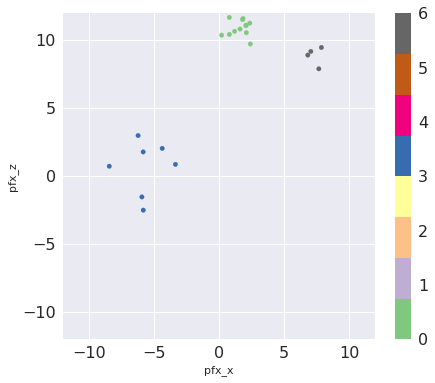

In [14]:
import matplotlib.cm as cm
chapman_df.plot(kind="scatter", x="pfx_x", y="pfx_z", figsize=(7,6), xlim=(-12, 12), ylim=(-12, 12), c=chapman_df["pitch_type_id"], cmap=cm.Accent)

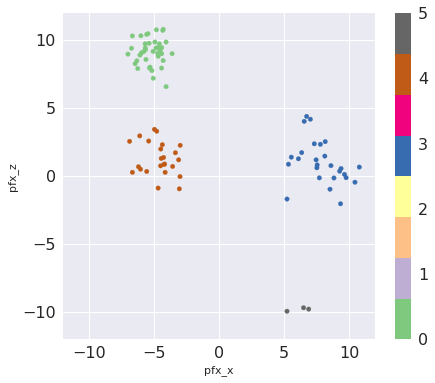

In [15]:
ohtani_df.plot(kind="scatter", x="pfx_x", y="pfx_z", figsize=(7,6), xlim=(-12, 12), ylim=(-12, 12), c=ohtani_df["pitch_type_id"], cmap=cm.Accent)

[]

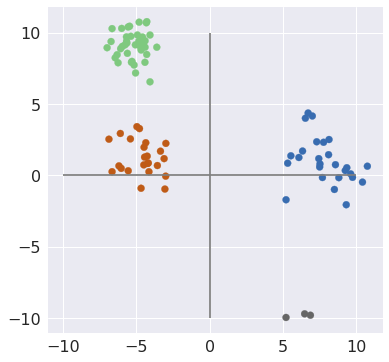

In [16]:
plt.figure(figsize=(6, 6))
plt.scatter(x=ohtani_df["pfx_x"], y=ohtani_df["pfx_z"], c=ohtani_df["pitch_type_id"], cmap=cm.Accent)
plt.hlines(y=0,xmin=-10,xmax=10, colors="gray")
plt.vlines(x=0,ymin=-10,ymax=10, colors="gray")
plt.plot()

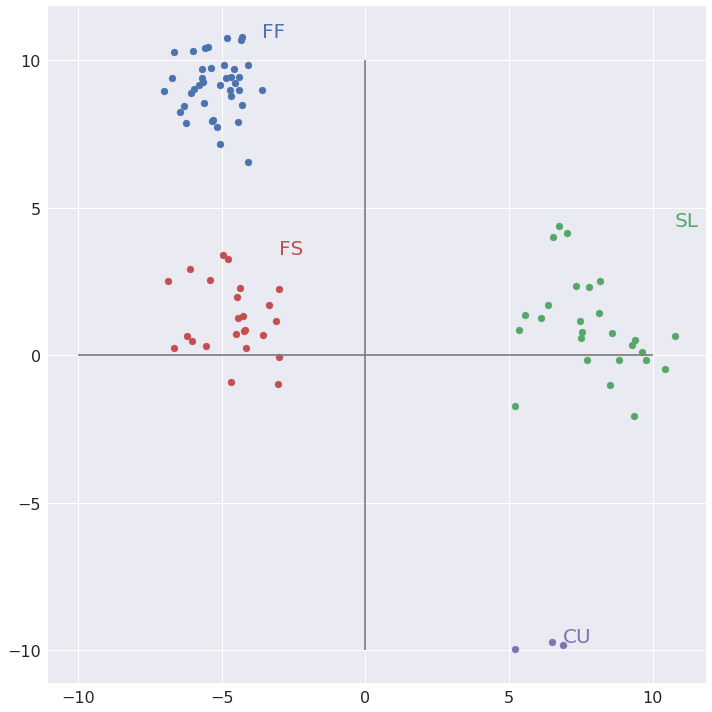

In [67]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10),tight_layout=True)

x_term = "pfx_x"
y_term = "pfx_z"

for ball_type in ohtani_df["pitch_type"].unique():
    tmp_df = ohtani_df[ohtani_df["pitch_type"]==ball_type]
    path = ax.scatter(x=tmp_df[x_term], y=tmp_df[y_term])
    plt.text(tmp_df[x_term].max(), tmp_df[y_term].max(), ball_type, fontsize=20, color=path.get_facecolor()[0])
#     print(path.get_facecolor()[0])
plt.hlines(y=0,xmin=-10,xmax=10, colors="gray")
plt.vlines(x=0,ymin=-10,ymax=10, colors="gray")
plt.show()

* 球種別被打率
* 直前の球種・コース・速度など属性に入れて決定木で打たれる打たれないの分類  
　直前の球種・コース・速度と交互作用項も入れて  
　→ 何が打たれやすいか（球種・速度・直前の球種との兼ね合いとかとか）

In [74]:
ohtani_df

,pitcher_id,batter_id,pitch_type,start_speed,end_speed,spin_dir,spin_rate,pfx_x,pfx_z,px,pz,x0,y0,ax,ay,az,vx0,vy0,vz0,sz_top,sz_bot,gid,pitch_type_id
531,660271,543760,FF,96.4,88.3,210.225,2478.278,-6.005155,10.306862,-0.360246,2.814406,-1.963065,50.0,-12.054512,29.045056,-11.484458,6.621960,-140.174522,-6.795326,3.539797,1.597221,gid_2018_04_01_anamlb_oakmlb_1,0
532,660271,476704,FF,98.1,89.6,210.308,2374.723,-5.679445,9.715485,-0.588725,3.065063,-2.116474,50.0,-11.790881,30.899750,-12.004096,6.403052,-142.733484,-6.172308,3.218175,1.398752,gid_2018_04_01_anamlb_oakmlb_1,0
533,660271,476704,FF,98.8,90.1,206.292,2232.461,-4.659284,9.430037,-0.563494,3.590123,-2.171010,50.0,-9.798809,31.753567,-12.342004,6.294481,-143.753020,-4.638248,3.524711,1.622442,gid_2018_04_01_anamlb_oakmlb_1,0
534,660271,476704,FF,99.0,90.4,201.869,2062.617,-3.607847,8.988397,-0.930606,3.600992,-2.158159,50.0,-7.635731,31.816722,-13.150796,4.840331,-144.179892,-4.560563,3.652807,1.665165,gid_2018_04_01_anamlb_oakmlb_1,0
535,660271,476704,FF,98.6,90.2,201.995,2444.695,-4.322808,10.701040,-0.317770,3.491256,-2.055636,50.0,-9.055547,31.647381,-9.757191,6.527969,-143.474867,-5.381344,3.218175,1.398752,gid_2018_04_01_anamlb_oakmlb_1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8225,660271,501981,FS,90.4,83.7,253.931,903.669,-4.442697,1.279699,0.219523,1.708112,-2.089042,50.0,-7.872109,24.854755,-29.906523,7.531790,-131.519873,-5.422508,3.389236,1.449026,gid_2018_04_01_anamlb_oakmlb_1,4
8226,660271,501981,FS,88.3,81.4,259.049,687.911,-3.567466,0.690291,0.256388,2.498019,-1.990933,50.0,-5.978839,25.747013,-31.017167,6.883614,-128.430298,-3.090088,3.389236,1.449026,gid_2018_04_01_anamlb_oakmlb_1,4
8578,660271,621471,CU,75.6,69.5,33.738,1879.197,6.485455,-9.710235,-0.247544,2.959161,-1.920122,50.0,7.911429,20.200841,-44.019298,1.800589,-109.969650,2.645717,3.237060,1.352175,gid_2018_04_01_anamlb_oakmlb_1,5
8581,660271,476704,CU,74.6,68.8,27.627,1771.004,5.215314,-9.964007,-0.410908,1.614145,-1.956824,50.0,6.146797,21.287070,-43.917681,1.854907,-108.583793,0.202880,3.218120,1.398697,gid_2018_04_01_anamlb_oakmlb_1,5


In [80]:
p_df
names_df
with_name = pd.merge(p_df, names_df, left_on="pitcher_id", right_on="id")

In [81]:
with_name.sort_values(by="start_speed", ascending=False)

,pitcher_id,batter_id,pitch_type,start_speed,end_speed,spin_dir,spin_rate,pfx_x,pfx_z,px,pz,x0,y0,ax,ay,az,vx0,vy0,vz0,sz_top,sz_bot,gid,pitch_type_id,id,first_name,last_name
10673,663855,453943,SI,101.0,91.3,247.355,2216.321,-9.526710,3.974263,1.284839,3.102965,-0.944411,50.0,-20.685169,35.946841,-23.544804,10.023157,-146.712846,-4.133458,3.206261,1.425016,gid_2018_04_01_slnmlb_nynmlb_1,6,663855,Jordan,Hicks
10671,663855,457803,SI,100.9,90.6,254.954,2402.473,-10.898244,2.929566,-1.621470,3.100595,-1.368845,50.0,-23.475613,38.904097,-25.863550,3.343724,-146.794676,-3.286269,3.427463,1.616042,gid_2018_04_01_slnmlb_nynmlb_1,6,663855,Jordan,Hicks
323,547973,475253,SI,100.8,91.7,135.788,2369.560,7.659606,7.873077,0.907567,2.758918,0.607910,50.0,16.724285,34.765022,-14.983664,-2.015733,-146.841021,-6.624882,3.355719,1.506648,gid_2018_03_30_nyamlb_tormlb_1,6,547973,Aroldis,Chapman
322,547973,518626,SI,100.5,91.6,140.240,2632.943,7.857642,9.444026,0.059379,2.410336,0.506181,50.0,16.972614,35.216682,-11.774826,-4.231119,-146.220262,-8.178177,3.304541,1.405062,gid_2018_03_30_nyamlb_tormlb_1,6,547973,Aroldis,Chapman
5024,594027,518792,FF,100.3,90.8,219.904,2512.010,-7.545474,9.022816,0.458191,2.845027,-2.006083,50.0,-16.179191,34.826224,-12.827103,9.896122,-145.657505,-6.692638,3.601111,1.829796,gid_2018_04_01_chnmlb_miamlb_1,0,594027,Tayron,Guerrero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3969,434671,600474,CH,67.9,62.7,193.244,821.610,-1.303480,5.537406,1.563046,0.716076,0.235208,50.0,-1.283543,16.672459,-26.721336,2.915929,-98.913687,-2.780257,3.358920,1.574266,gid_2018_04_02_wasmlb_atlmlb_1,2,434671,Anibal,Sanchez
3968,434671,594694,CH,67.7,61.8,215.199,1202.287,-4.812674,6.822299,0.352945,2.290179,0.141904,50.0,-4.714121,16.681642,-25.491455,1.623226,-98.682505,-0.147624,2.969799,1.192217,gid_2018_04_02_wasmlb_atlmlb_1,2,434671,Anibal,Sanchez
10285,592222,545358,CH,67.6,62.3,69.292,1588.415,10.314886,-3.899204,0.917011,0.655846,2.860580,50.0,10.045753,15.572673,-35.971516,-6.357350,-98.090079,1.328291,3.477805,1.601055,gid_2018_04_01_houmlb_texmlb_1,2,592222,Alex,Claudio
10290,592222,514888,CH,67.3,62.0,77.754,1623.134,11.063310,-2.401138,2.062140,1.614286,3.158306,50.0,10.694835,15.756194,-34.495214,-4.886504,-97.817697,3.002620,2.842587,1.175299,gid_2018_04_01_houmlb_texmlb_1,2,592222,Alex,Claudio


In [88]:
p_df[p_df["pitcher_id"]==547973]

,pitcher_id,batter_id,pitch_type,start_speed,end_speed,spin_dir,spin_rate,pfx_x,pfx_z,px,pz,x0,y0,ax,ay,az,vx0,vy0,vz0,sz_top,sz_bot,gid,pitch_type_id
67,547973,518626,FF,97.3,88.3,176.138,2424.902,0.787173,11.655333,-0.410841,2.702496,0.908188,50.0,1.594576,32.916450,-8.563837,-3.969297,-141.577827,-7.365840,3.305409,1.406029,gid_2018_03_30_nyamlb_tormlb_1,0
68,547973,518626,FF,99.4,90.3,170.974,2487.691,1.839122,11.575464,-1.041255,2.262586,0.616216,50.0,3.888651,33.784849,-7.698819,-5.410162,-144.525720,-8.811593,3.336387,1.582300,gid_2018_03_30_nyamlb_tormlb_1,0
69,547973,475253,FF,99.0,91.0,171.532,2320.566,1.608178,10.799566,-0.784651,2.240777,0.617082,50.0,3.395274,32.287140,-9.373408,-4.590362,-144.117601,-8.818250,3.355719,1.506648,gid_2018_03_30_nyamlb_tormlb_1,0
70,547973,456665,FF,98.8,89.7,173.609,2262.148,1.191335,10.632659,0.083646,3.827676,0.738782,50.0,2.498623,33.374646,-9.873842,-2.301130,-143.912392,-4.473848,3.481290,1.529978,gid_2018_03_30_nyamlb_tormlb_1,0
71,547973,456665,FF,98.4,89.5,168.152,2414.696,2.356974,11.233668,0.172944,2.198333,0.723214,50.0,4.892021,32.897706,-8.857994,-2.420701,-143.135929,-8.881594,3.474310,1.529024,gid_2018_03_30_nyamlb_tormlb_1,0
72,547973,456665,FF,97.7,88.7,178.920,2164.985,0.195434,10.350331,-0.773950,3.995250,0.601016,50.0,0.400928,32.561049,-10.940622,-3.934989,-142.312726,-3.814519,3.305409,1.325533,gid_2018_03_30_nyamlb_tormlb_1,0
73,547973,456665,FF,98.5,90.1,169.435,2367.583,2.061421,11.050186,-0.354567,2.255864,0.698314,50.0,4.287175,32.829041,-9.192767,-3.736436,-143.251397,-8.442880,3.304545,1.324566,gid_2018_03_30_nyamlb_tormlb_1,0
74,547973,545341,FF,98.6,90.0,168.783,2275.447,2.088379,10.529125,0.761695,2.905857,0.996974,50.0,4.383790,31.909963,-10.071988,-1.439932,-143.663393,-6.422503,3.136329,1.473470,gid_2018_03_30_nyamlb_tormlb_1,0
75,547973,545341,FF,98.4,89.2,169.414,2365.476,2.072040,11.085070,-1.751039,2.437222,0.477844,50.0,4.286221,33.628088,-9.243479,-7.049834,-143.072149,-7.754248,3.185112,1.530278,gid_2018_03_30_nyamlb_tormlb_1,0
76,547973,545341,FF,98.4,90.0,171.085,2452.504,1.803338,11.494099,0.552208,2.675397,0.888470,50.0,3.753731,32.610744,-8.248549,-1.614848,-143.262667,-7.496175,3.174605,1.325533,gid_2018_03_30_nyamlb_tormlb_1,0
